### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split

### LOADING THE DATA

In [2]:
X, y = datasets.make_regression(n_samples=600, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

y_train = y_train.reshape(len(y_train), 1)
X_test = X_test.reshape(len(X_test), 1)
y_test = y_test.reshape(len(y_test), 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(480, 1) (480, 1)
(120, 1) (120, 1)


### VISUALISING THE DATASET

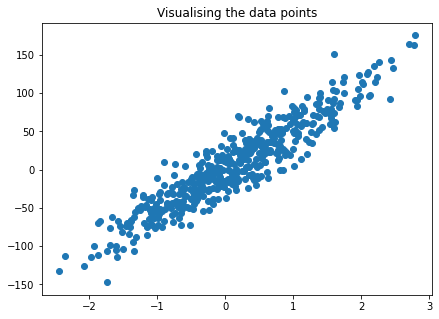

In [3]:
plt.figure(figsize=(7,5))
plt.title('Visualising the data points')
plt.scatter(X_train, y_train)

### TESTING OUR OWN SIMPLE LINEAR REGRESSION MODEL

In [4]:
import linear_regression as slr
regressor = slr.LinearRegression(X_train, y_train)
regressor.train()

After epoch 0 loss : [[49473.58525745]], weights: [[24.44823941]], bias: [[3.37625936]]
After epoch 50 loss : [[5.59862747e-20]], weights: [[53.0199589]], bias: [[0.34217547]]
reached less than optimal loss


### TESTING OUR MODEL WITH TEST DATA

In [5]:
predictions = regressor.predict(X_test.T)
regressor.loss(predictions, y_test.T)

array([[8877.95088022]])

### NOW DOING THE SAME THING WITH SKLEARN

In [6]:
from sklearn.linear_model import LinearRegression 

reg_sk = LinearRegression().fit(X_train, y_train)
preds_sk = reg_sk.predict(X_test)

In [7]:
regressor.loss(preds_sk.T, y_test.T)

array([[8558.74276659]])

### RESULTS: 
The loss for X_test, y_test for our model : 8877.95088022

and for the sklearn model, the loss becomes: 8558.74276659

Which is somewhat ok ... as the difference between the loss is not that much

### Visualising the regression line

In [8]:
m_model, b_model = float(regressor.W), float(regressor.b)
m_sk, b_sk = float(reg_sk.coef_), float(reg_sk.intercept_)

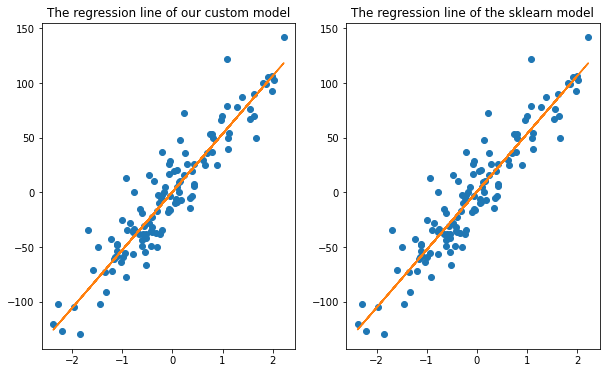

In [9]:
fig = plt.figure(figsize=(10,6))

fig.add_subplot(1,2,1)
plt.title('The regression line of our custom model')
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, m_model*X_test+b_model)

fig.add_subplot(1,2,2)
plt.title('The regression line of the sklearn model')
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, m_sk*X_test+b_sk)